In [ ]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import numpy.polynomial.legendre as leg

# Lista funkcji i nazw
funkcje = {
    "1": lambda x: 1,
    "x": lambda x: x,
    "x^2": lambda x: x**2,
    "|x|": lambda x: np.abs(x),
    "sin(x)": lambda x: np.sin(x),
    "exp(x)": lambda x: np.exp(x),
    "1/(1+x^2)": lambda x: 1/(1+x**2),
}

# Parametry użytkownika
tolerancja_simpson = 1
delta_simpson = 1.0



In [ ]:
def simpson(f, delta, tolerance, exact_value=None):
    wynik = 0.0
    a = 0.0
    errors = []
    # Positive direction
    while True:
        x = np.linspace(a, a + delta, 1000)
        y = f(x)
        part = scipy.integrate.simpson(y, x)
        if abs(part) < tolerance:
            break
        wynik += part
        if exact_value is not None:
            errors.append(abs(wynik - exact_value))
        a += delta
        print(abs(part))
    # Negative direction
    a = 0.0
    while True:
        x = np.linspace(-a - delta, -a, 1000)
        y = f(x)
        part = scipy.integrate.simpson(y, x)
        if abs(part) < tolerance:
            break
        wynik += part
        if exact_value is not None:
            errors.append(abs(wynik - exact_value))
        a += delta
    return wynik, errors

In [ ]:
def legendre_approx(f, degree, simpson_delta, simpson_tol):
    # Funkcje bazowe Legendre'a
    P = [leg.Legendre.basis(i) for i in range(degree+1)]
    coeffs = []
    # Oblicz współczynniki rozwinięcia
    for n in range(degree+1):
        print("n:", n)
        def integrand(x):
            return f(x) * P[n](x)
        # Norma wielomianu Legendre'a na [-1,1] to 2/(2n+1)
        norm = 2/(2*n+1)
        print("liczenie simpson")
        c, _ = simpson(integrand, simpson_delta, simpson_tol)
        print("c:", c)
        coeffs.append(c / norm)
    # Składanie wielomianu aproksymacyjnego
    def approx(x):
        return sum(coeffs[n] * P[n](x) for n in range(degree+1))
    return approx, coeffs

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


KeyboardInterrupt: 

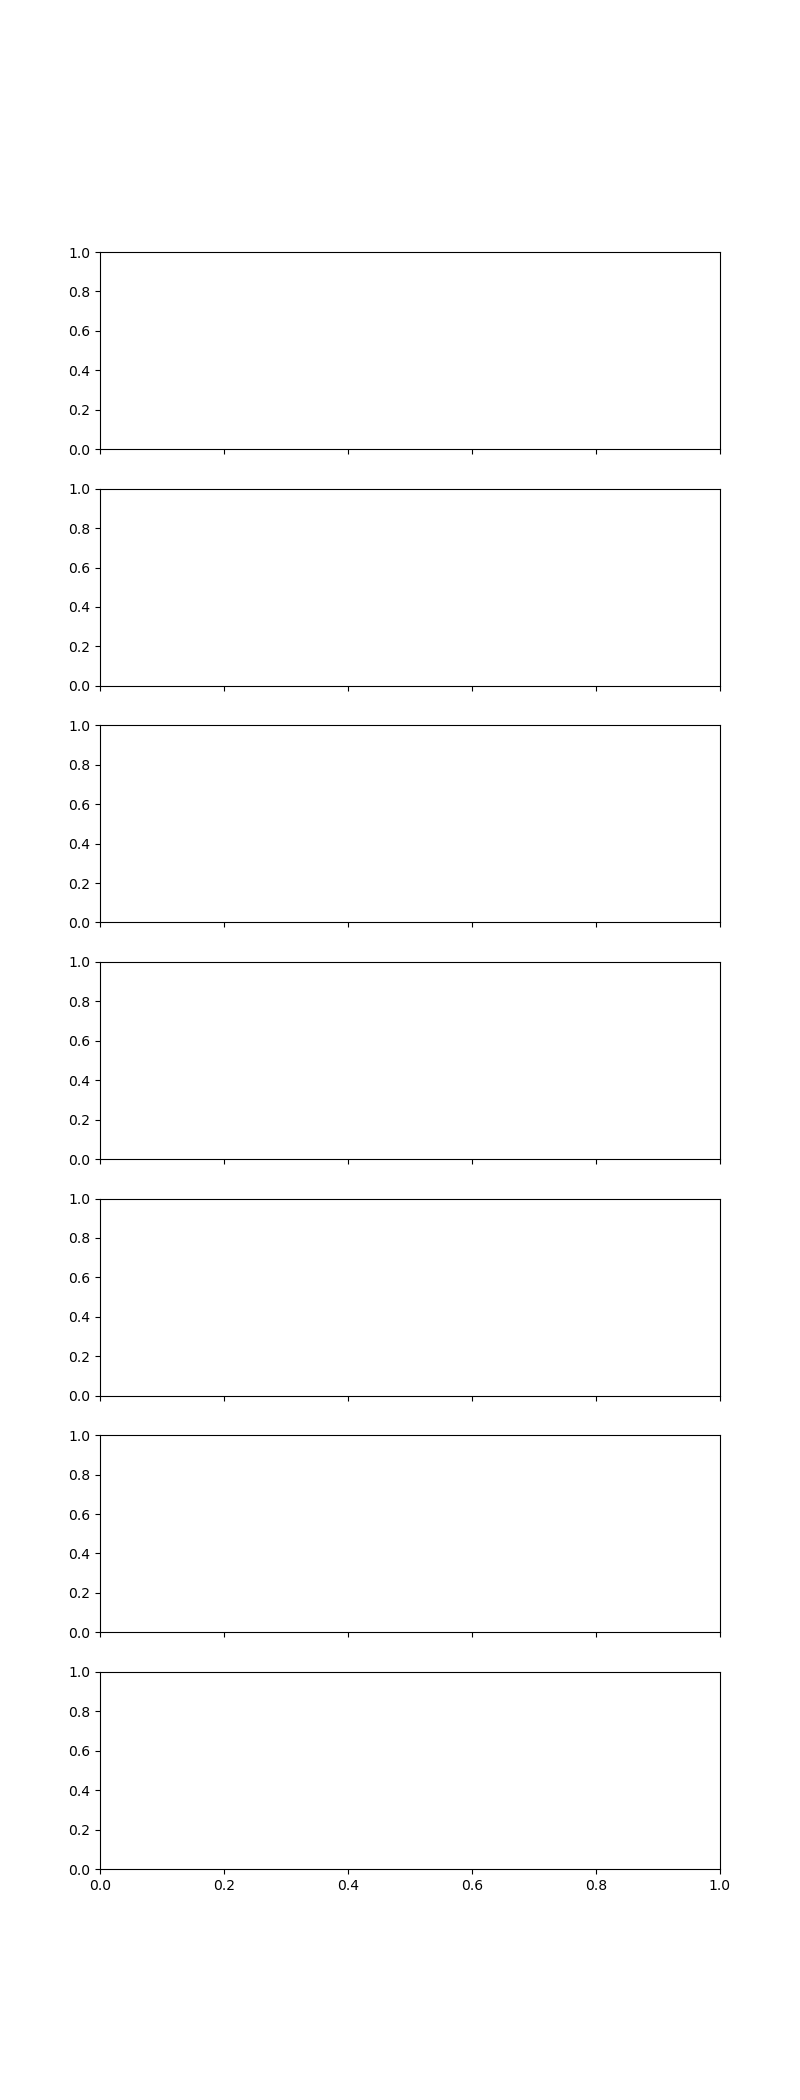

In [4]:
degree = 4  # Możesz zmienić stopień aproksymacji
n_funcs = len(funkcje)
fig, axs = plt.subplots(n_funcs, 1, figsize=(8, 3*n_funcs), sharex=True)

x = np.linspace(-1, 1, 400)

for idx, (name, f) in enumerate(funkcje.items()):
    print(f"Funkcja: {name}")
    approx, coeffs = legendre_approx(f, degree, delta_simpson, tolerancja_simpson)
    axs[idx].plot(x, f(x), label="oryginał")
    axs[idx].plot(x, approx(x), label=f"aproksymacja (stopień {degree})")
    axs[idx].set_title(f"Funkcja: {name}")
    axs[idx].legend()
    # Oblicz błąd aproksymacji (norma L2)
    def error_func(x):
        return (f(x) - approx(x))**2
    error, _ = simpson(error_func, delta_simpson, tolerancja_simpson)
    axs[idx].text(0.05, 0.85, f"Błąd L2: {np.sqrt(error):.3e}", transform=axs[idx].transAxes)

plt.tight_layout()
plt.show()